### Tensorflow and Keras

In [3]:
# !pip install --upgrade protobuf==3.20.3

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

2025-11-29 03:56:36.576343: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764388596.782218      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764388596.841767      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [5]:
from tensorflow.keras.preprocessing.image import load_img

In [6]:
# Version of tensorflow
tf.__version__

'2.18.0'

Download the dataset and import

In [7]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 45.92 MiB/s, done.
Resolving deltas: 100% (10/10), done.


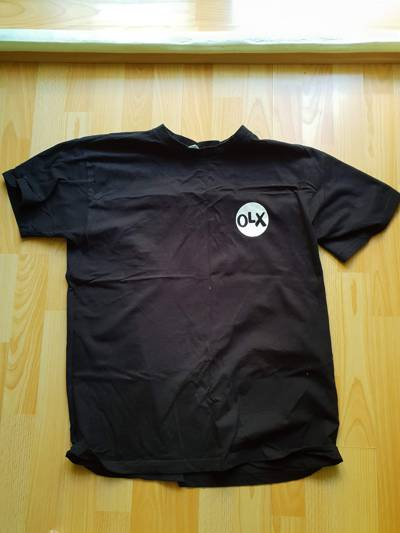

In [8]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

Neural networks expect an image of either 299x299, 224x224 or 150x150

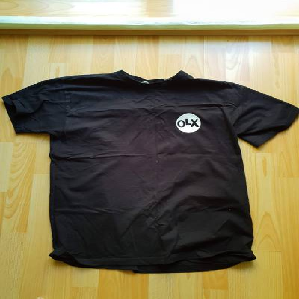

In [9]:
img = load_img(fullname, target_size=(299,299))
img

In [10]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7BC2646C20D0>


In [11]:
x = np.array(img) #( R, G, B) values
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [12]:
x.shape

(299, 299, 3)

### 8.3 Pre-trained Convolutional Neural Network
- imagenet dataset: https://www.image-net.org/update-mar-11-2021.php
- pre-trained models: https://keras.io/api/applications/

In [13]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [14]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

I0000 00:00:1764388616.700223      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764388616.700802      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


We are going to use this model to classify this image

In [15]:
X = np.array([x])

This is how we concatenate many images. 
If we had 3 images then we would do

X = np.array([x, y, z])

In [16]:
model.predict(X)

I0000 00:00:1764388620.574141     124 service.cc:148] XLA service 0x7bc1a80041b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764388620.575160     124 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1764388620.575179     124 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1764388621.022259     124 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


I0000 00:00:1764388623.761336     124 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

Most of the values are zeroes. This is because we need to preprocess the input.

##### Note: capital X in the bracket and not small x -> X = preprocess_input(X)

In [17]:
X = preprocess_input(X)

In [18]:
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [19]:
X.shape

(1, 299, 299, 3)

The numbers are now between -1 and 1 and not 0 to 255

In [20]:
pred = model.predict(X) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [21]:
pred.shape

(1, 1000)

In [22]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', 0.6819633),
  ('n02916936', 'bulletproof_vest', 0.038140036),
  ('n04370456', 'sweatshirt', 0.034324724),
  ('n03710637', 'maillot', 0.011354209),
  ('n04525038', 'velvet', 0.0018453574)]]

The model does not do a very good job in terms of classifying because the mapped classes don't have t-shirts as a category. So we need to use a different model with more apt classes

### 8.4 Convolutional Neural Networks
- types of layers: convolutional and dense
- convolutional layers and filters
- dense layers

There are more layers. Read here: https://cs231n.github.io/

Convolutional neural networks are mostly used for images

### 8.5 Transfer Learning
- Reading data with `ImageDataGenerator`
- Train `Xception` on smaller images (150x150)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [25]:
train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train', target_size=(150,150), batch_size=32)

Found 3068 images belonging to 10 classes.


In [26]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

This is in line to what we have in the training dataset

In [27]:
!ls -l clothing-dataset-small/train

total 256
drwxr-xr-x 2 root root 20480 Nov 29 03:56 dress
drwxr-xr-x 2 root root 12288 Nov 29 03:56 hat
drwxr-xr-x 2 root root 36864 Nov 29 03:56 longsleeve
drwxr-xr-x 2 root root 16384 Nov 29 03:56 outwear
drwxr-xr-x 2 root root 36864 Nov 29 03:56 pants
drwxr-xr-x 2 root root 20480 Nov 29 03:56 shirt
drwxr-xr-x 2 root root 20480 Nov 29 03:56 shoes
drwxr-xr-x 2 root root 20480 Nov 29 03:56 shorts
drwxr-xr-x 2 root root 12288 Nov 29 03:56 skirt
drwxr-xr-x 2 root root 65536 Nov 29 03:56 t-shirt


In [28]:
X, y = next(train_ds)

In [29]:
X

array([[[[-0.14509803, -0.19999999, -0.27843136],
         [ 0.07450986,  0.0196079 , -0.05882353],
         [ 0.1686275 ,  0.11372554,  0.03529418],
         ...,
         [ 0.6       ,  0.5529412 ,  0.45882356],
         [ 0.5921569 ,  0.54509807,  0.45098042],
         [ 0.58431375,  0.5372549 ,  0.4431373 ]],

        [[-0.20784312, -0.26274508, -0.34117645],
         [-0.2862745 , -0.34117645, -0.41960782],
         [-0.3490196 , -0.40392154, -0.4823529 ],
         ...,
         [ 0.6313726 ,  0.58431375,  0.4901961 ],
         [ 0.6156863 ,  0.5686275 ,  0.47450984],
         [ 0.6156863 ,  0.5686275 ,  0.47450984]],

        [[-0.46666664, -0.5137255 , -0.62352943],
         [-0.46666664, -0.5137255 , -0.62352943],
         [-0.4588235 , -0.5058824 , -0.6156863 ],
         ...,
         [ 0.6313726 ,  0.58431375,  0.4901961 ],
         [ 0.6313726 ,  0.58431375,  0.4901961 ],
         [ 0.6313726 ,  0.58431375,  0.4901961 ]],

        ...,

        [[ 0.21568632,  0.1686275 ,  0

In [30]:
X.shape

(32, 150, 150, 3)

In [31]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [32]:
y

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 

In [33]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./clothing-dataset-small/train', target_size=(150,150), batch_size=32,shuffle=False)

Found 3068 images belonging to 10 classes.


Our base model is Xception and we will then fine tune it to our requirement

Now lets create a new top

In [34]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

inputs = keras.Input(shape=(150,150, 3))

base = base_model(inputs, training=False) # this is 3D

# pooling = keras.layers.GlobalAveragePooling2D()
# vectors = pooling(base)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs,outputs)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [35]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [36]:
preds.shape

(32, 10)

#### Applying Optimizers

In [37]:
learning_rate=0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [38]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [39]:
# history = model.fit(train_ds, epochs=10, validation_data=val_ds)

In [40]:
history_val_accuracy = [0.7887874841690063,
 0.8878748416900635,
 0.899608850479126,
 0.9380704164505005,
 0.9674054980278015,
 0.9817470908164978,
 0.9863103032112122,
 0.9938070178031921,
 0.9947848916053772,
 0.9980443120002747]

In [41]:
# history.history['accuracy']
# history.history['val_accuracy']

In [42]:
# plt.plot(history.history['val_accuracy'], label='val')
# plt.legend()

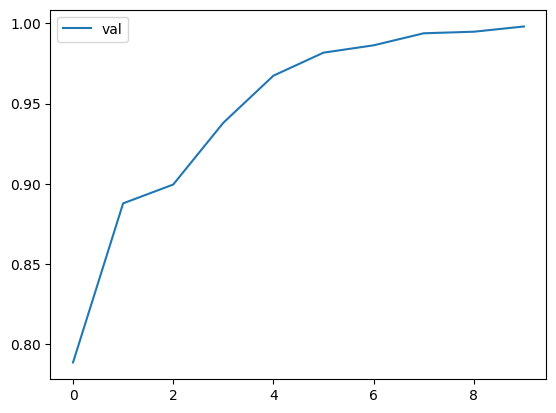

In [43]:
plt.plot(history_val_accuracy, label='val')
plt.legend()


### 8.6 Adjusting the Learning Rate
- What's learning rate
- Trying different values

In [44]:
def make_model(learning_rate=0.01):
    
    base_model = Xception(weights='imagenet', 
                          include_top=False, 
                          input_shape=(150, 150, 3))
    base_model.trainable = False

    #################################
    
    inputs = keras.Input(shape=(150,150, 3))
    
    base = base_model(inputs, training=False) # this is 3D
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    outputs = keras.layers.Dense(10)(vectors)
    
    model = keras.Model(inputs,outputs)

    #################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])

    return model

In [45]:
# scores = {}

# for lr in [0.0001, 0.001, 0.01, 0.1]:
#     print(lr)
#     model = make_model(learning_rate=lr)
#     history = model.fit(train_ds, epochs=10, validation_data=val_ds)
#     scores[lr] = history.history
#     print()
#     print()
    

In [46]:
# for lr, hist in scores.items():
#     plt.plot(hist['val_accuracy'], label=('val=%s' % lr))
#     plt.legend()

The best learning rate is 0.01

In [47]:
# hist['accuracy']

### Checkpointing
- Saving the best model only
- Training a model with callbacks

In [48]:
model.save_weights('model_v1.weights.h5')

In [49]:
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=3, val_accuracy=0.84)

'xception_v1_03_0.840.h5'

In [50]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
                               save_best_only=True,
                               monitor='val_accuracy',
                               mode='max'
                               )

In [51]:
# learning_rate = 0.01

# model = make_model(learning_rate=learning_rate)
# history = model.fit(
#     train_ds, 
#     epochs=10, 
#     validation_data=val_ds,
# callbacks=[checkpoint])

### Adding more layers
- Adding one inner dense layer
- Experimenting with different sizes of inner layer
  

In [52]:
def make_model(learning_rate=0.01, size_inner=100):
    
    base_model = Xception(weights='imagenet', 
                          include_top=False, 
                          input_shape=(150, 150, 3))
    base_model.trainable = False

    #################################
    
    inputs = keras.Input(shape=(150,150, 3))
    
    base = base_model(inputs, training=False) # this is 3D
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs,outputs)

    #################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])

    return model

In [53]:
# learning_rate = 0.01
# scores = {}

# for size in [10, 100, 1000]:
#     print(size)
#     model = make_model(learning_rate=learning_rate, size_inner=size)
#     history = model.fit(train_ds, epochs=10, validation_data=val_ds)
#     scores[size] = history.history
#     print()
#     print()
    

In [54]:
# for size, hist in scores.items():
#     plt.plot(hist['val_accuracy'], label=('val=%s' % size))
#     plt.legend()

Value of 100 or 1000 seems to perform better so lets use 100.


In [55]:
size_inner = 100

## Regularization and dropout
- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

In [56]:
# Introducing dropout in the model

def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    
    base_model = Xception(weights='imagenet', 
                          include_top=False, 
                          input_shape=(150, 150, 3))
    base_model.trainable = False

    #################################
    
    inputs = keras.Input(shape=(150,150, 3))
    
    base = base_model(inputs, training=False) # this is 3D
    
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner) # Drop rate is 20%
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs,outputs)

    #################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])

    return model

In [57]:
# learning_rate = 0.01
# size = 100
# scores ={}

# for droprate in [0.0, 0.2, 0.5, 0.8]:
#     print(droprate)
#     model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
#     history = model.fit(train_ds, epochs=30, validation_data=val_ds)
#     scores[droprate] = history.history
#     print()
#     print()
    

In [58]:
# for droprate, hist in scores.items():
#     plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))
#     plt.legend()

The dropout rate of 0 and 0.2 are the highest. Better to go with 0.2 so there is some dropout.

## Data Augmentation
- Different data augmentations
- Training a model with augmentations
- How to select 

In [59]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [60]:
# learning_rate = 0.01
# size = 100
# droprate = 0.2

# model = make_model(learning_rate=learning_rate, 
#                    size_inner=size, 
#                    droprate=droprate)

# history = model.fit(train_ds, epochs=50, validation_data=val_ds)

50th iteration gives:  accuracy: 0.8186 - loss: 0.5494 - val_accuracy: 0.7537 - val_loss: 1.0433..

The model seemed to perform better when there was no data augmentation

## 8.11 Training a larger model
- Train a 299x299 model

In [61]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [62]:
input_size = 299

In [67]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [68]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [69]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.5448 - loss: 1.3870

96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 694ms/step - accuracy: 0.5462 - loss: 1.3830 - val_accuracy: 0.8504 - val_loss: 0.5313
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 598ms/step - accuracy: 0.8090 - loss: 0.5699

96/96 ━━━━━━━━━━━━━━━━━━━━ 61s 635ms/step - accuracy: 0.8091 - loss: 0.5696 - val_accuracy: 0.8651 - val_loss: 0.4416
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.8453 - loss: 0.4638

96/96 ━━━━━━━━━━━━━━━━━━━━ 61s 632ms/step - accuracy: 0.8454 - loss: 0.4636 - val_accuracy: 0.8798 - val_loss: 0.3790
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.8832 - loss: 0.3639

96/96 ━━━━━━━━━━━━━━━━━━━━ 61s 628ms/step - accuracy: 0.8831 - loss: 0.3641 - val_accuracy: 0.8915 - val_loss: 0.3688
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 62s 641ms/step - accuracy: 0.8774 - loss: 0.3430 - val_accuracy: 0.8680 - val_loss: 0.3704
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 61s 630ms/step - accuracy: 0.8929 - loss: 0.3252 - val_accuracy: 0.8856 - val_loss: 0.3548
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 62s 645ms/step - accuracy: 0.9023 - loss: 0.2878 - val_accuracy: 0.8915 - val_loss: 0.3504
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 61s 628ms/step - accuracy: 0.9033 - loss: 0.2963 - val_accuracy: 0.8768 - val_loss: 0.3550
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.9123 - loss: 0.2520

96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 627ms/step - accuracy: 0.9123 - loss: 0.2520 - val_accuracy: 0.8944 - val_loss: 0.3436
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 621ms/step - accuracy: 0.9111 - loss: 0.2571 - val_accuracy: 0.8856 - val_loss: 0.3444
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 623ms/step - accuracy: 0.9230 - loss: 0.2200 - val_accuracy: 0.8739 - val_loss: 0.3739
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 61s 638ms/step - accuracy: 0.9323 - loss: 0.2029 - val_accuracy: 0.8886 - val_loss: 0.3485
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 613ms/step - accuracy: 0.9380 - loss: 0.1892 - val_accuracy: 0.8915 - val_loss: 0.3479
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 0.9511 - loss: 0.1691

96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 616ms/step - accuracy: 0.9509 - loss: 0.1693 - val_accuracy: 0.8974 - val_loss: 0.3404
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 61s 637ms/step - accuracy: 0.9342 - loss: 0.1848 - val_accuracy: 0.8974 - val_loss: 0.3577
Epoch 16/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 61s 635ms/step - accuracy: 0.9446 - loss: 0.1674 - val_accuracy: 0.8768 - val_loss: 0.3757
Epoch 17/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 619ms/step - accuracy: 0.9534 - loss: 0.1579 - val_accuracy: 0.8798 - val_loss: 0.3522
Epoch 18/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 61s 630ms/step - accuracy: 0.9463 - loss: 0.1653 - val_accuracy: 0.8915 - val_loss: 0.3524
Epoch 19/50
31/96 ━━━━━━━━━━━━━━━━━━━━ 38s 600ms/step - accuracy: 0.9608 - loss: 0.1427

KeyboardInterrupt: 

## 8.12 Using the model
- Loading the model
- Evaluating the model
- Getting predictions

In [87]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [79]:
model = keras.models.load_model('xception_v4_1_14_0.897.h5')

# model = keras.models.load_model('xception_v4_1_04_0.891.h5')

In [83]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import load_img

In [81]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299,299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [82]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 377ms/step - accuracy: 0.8800 - loss: 0.3164


[0.24334119260311127, 0.9112903475761414]

Results of model.eval = [0.24334119260311127, 0.9112903475761414]

In [84]:
path = '/kaggle/working/clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

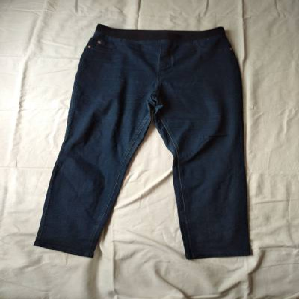

In [86]:
load_img(path, target_size=(299,299))

In [88]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [89]:
X

array([[[[179, 171,  99],
         [179, 171,  99],
         [181, 173, 101],
         ...,
         [251, 253, 248],
         [251, 253, 248],
         [251, 254, 247]],

        [[188, 179, 112],
         [187, 178, 111],
         [186, 177, 108],
         ...,
         [251, 252, 247],
         [251, 252, 247],
         [251, 252, 246]],

        [[199, 189, 127],
         [200, 190, 128],
         [200, 191, 126],
         ...,
         [250, 251, 245],
         [250, 251, 245],
         [250, 251, 245]],

        ...,

        [[165, 151,  76],
         [173, 159,  84],
         [171, 157,  82],
         ...,
         [183, 135,  25],
         [181, 133,  22],
         [183, 135,  24]],

        [[165, 151,  76],
         [173, 159,  84],
         [171, 157,  82],
         ...,
         [182, 134,  23],
         [180, 132,  21],
         [182, 134,  23]],

        [[165, 151,  76],
         [173, 159,  84],
         [171, 157,  82],
         ...,
         [181, 133,  22],
        

In [90]:
preprocess_input(X)

array([[[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.41960788,  0.35686278, -0.20784312],
         ...,
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.99215686,  0.9372549 ]],

        [[ 0.47450984,  0.4039216 , -0.12156862],
         [ 0.4666667 ,  0.39607847, -0.12941176],
         [ 0.45882356,  0.38823533, -0.15294117],
         ...,
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.92941177]],

        [[ 0.56078434,  0.48235297, -0.00392157],
         [ 0.5686275 ,  0.4901961 ,  0.00392163],
         [ 0.5686275 ,  0.49803925, -0.01176471],
         ...,
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863]],

        ...,

        [[ 0.2941177 ,  0.18431377, -0

In [92]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [93]:
pred[0]

array([  84.59165  ,   -2.4172342,  -13.682234 ,  -31.180256 ,
        -65.26065  ,   -4.213915 ,   25.475367 ,  -99.87252  ,
       -136.22795  ,   27.6361   ], dtype=float32)

In [94]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [95]:
classes = ['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [96]:
dict(zip(classes, pred[0]))

{'dress': 84.59165,
 'hat': -2.4172342,
 'longsleeve': -13.682234,
 'outwear': -31.180256,
 'pants': -65.26065,
 'shirt': -4.213915,
 'shoes': 25.475367,
 'shorts': -99.87252,
 'skirt': -136.22795,
 't-shirt': 27.6361}

result = {'dress': 84.59165,
 'hat': -2.4172342,
 'longsleeve': -13.682234,
 'outwear': -31.180256,
 'pants': -65.26065,
 'shirt': -4.213915,
 'shoes': 25.475367,
 'shorts': -99.87252,
 'skirt': -136.22795,
 't-shirt': 27.6361}

 We see that it clasifies it to a dress which is not a correct class for the image.. probably becuase we didn't train the model fully